<div class="alert alert-block alert-info">
    
<h1 style="color:Blue;"> <center> <ins> <b> 
Métodos Numéricos 
</b> </ins> </center> </h1>
    
<h2 style="color:Blue;"> <center> <b> 
Erros em Aproximações de Funções com Séries de Taylor
</b></center> </h2>
    
</div>

### Agenda de Hoje
1. [Expressando funções como séries de Taylor](#exp_taylor)
2. [Aproximações com séries de Taylor](#apx_taylor)
3. [Discussões sobre erros em aproximações com séries de Taylor](#erro_taylor)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

<div class="alert alert-block alert-info" style="color:Blue;" id="exp_taylor">
Expressando funções como séries de Taylor
</div>

Provavelmente (ao menos deveria) nas disciplinas de cálculo, vocês devem ter trabalhado com a possibilidade de representar funções a partir de séries, finitas e infinitas. Séries de MacLaurin, de Laurent e de Taylor são alguns tipos de de séries que comumente aparecem em cursos de cálculo.

No contexto de métodos numéricos, séries são sempre usadas para representação de funções. E dessas, a série de Taylor aparece quase sempre como uma das representações preferidas, principalmente para funções diferenciáveis.

Uma **expansão em série de Taylor** é uma representação de uma função como uma sequência de polinômios ao redor de um ponto, definida como

$$
f(x) = \sum_{n = 0}^{\infty} \frac{f^{(n)}(a)(x-a)^n}{n!},
$$

sendo $a$ o ponto de avaliação dessa série, $f^{(n)}$ a $n$-ésima derivada da função $f$ e $f^{(0)}$ a função propriamente dita.

Por exemplo, podemos verificar que a representação da função $f(x) = 5x^2 + 3x + 5$ usando série de Taylor é igual a própria função, avaliando-a para dois pontos distintos, no caso, $a = 0$, e $a = 1$. Nessa avaliação, vamos considerar somente os dois primeiros termos, uma vez que as derivadas de ordem igual ou superior a 3 são todas zero. 

Assim, expressando analiticamente, teríamos

\begin{eqnarray*}
f(x) &=& 5x^2 + 3x + 5\\
f^{\prime}(x) &=& 10x + 3\\
f''(x) &=& 10
\end{eqnarray*}

Expandindo em série de Taylor, temos:

$$
f(x) = \sum_{n = 0}^{\infty} \frac{f^{(n)}(a)(x-a)^n}{n!},
$$

* para o ponto a = 0:

$$f(x) = \frac{5x^0}{0!} + \frac{3x^1}{1!} + \frac{10x^2}{2!} + 0 + 0 + \cdots = 5x^2 + 3x + 5
$$

* para o ponto a = 1:

\begin{eqnarray*}
f(x) &=& \frac{13(x-1)^0}{0!} + \frac{13(x-1)^1}{1!} + \frac{10(x-1)^2}{2!} + 0 + \cdots\\
 &=& 13 + 13x - 13 + 5x^2 - 10x + 5 = 5x^2 + 3x + 5
\end{eqnarray*}

ou seja, de fato a representação em série retorna sempre a mesma função original.

<div class="alert alert-block alert-info" style="color:Blue;" id="apx_taylor">
Aproximações com séries de Taylor
</div>

Obviamente, para computadores é impossível calcular infinitamente termos de uma série. Dessa forma, temos um problema quando usamos uma série infinita como a série de Taylor, para representar funções durante operações numéricas, uma vez que nem supercomputadores poderiam calcular "ao infinito e além". 

A solução para esse problema é bem simples: aproximação, isto é, considerar um número finito de termos da série para aproximar funções com um erro que consideremos satisfatório. Chamamos essa abordagem de **aproximação com séries de Taylor**. 

Essa técnica é especialmente poderosa quando há um ponto em torno do qual temos conhecimento sobre uma função para todas as suas derivadas. Por exemplo, para a expansão de Taylor de $e^x$ em $a = 0$, temos $f^{(n)}(a) = 1$ para todo $n$ e, nesse caso, nem calcular as derivadas nós precisaríamos!

Obviamente o exemplo da exponencial é "batizado". Vamos considerar o caso da função seno, $f(x) = \sin(x)$, cuja representação por série de Taylor é dada por

$$f(x) = \frac{\sin(0)}{0!}x^0 + \frac{\cos(0)}{1!}x^1 + \frac{-\sin(0)}{2!}x^2 + \frac{-\cos(0)}{3!}x^3 + \frac{\sin(0)}{4!}x^4 + \frac{\cos(0)}{5!}x^5 + \cdots = \sum_{n = 0}^{\infty} \frac{(-1)^n x^{2n+1}}{(2n+1)!}$$

Vamos visualizar como a função se mostra quando consideramos aproximações de múltiplas ordens (ou seja, quantidade de termos).

Vamos primeiro criar um vetor para ser os valores de $x$ no qual vamos visualizar a função:

In [2]:
x = np.linspace(-np.pi, np.pi, 200)
x

array([-3.14159265, -3.11001886, -3.07844506, -3.04687127, -3.01529747,
       -2.98372368, -2.95214988, -2.92057608, -2.88900229, -2.85742849,
       -2.8258547 , -2.7942809 , -2.76270711, -2.73113331, -2.69955952,
       -2.66798572, -2.63641193, -2.60483813, -2.57326433, -2.54169054,
       -2.51011674, -2.47854295, -2.44696915, -2.41539536, -2.38382156,
       -2.35224777, -2.32067397, -2.28910017, -2.25752638, -2.22595258,
       -2.19437879, -2.16280499, -2.1312312 , -2.0996574 , -2.06808361,
       -2.03650981, -2.00493602, -1.97336222, -1.94178842, -1.91021463,
       -1.87864083, -1.84706704, -1.81549324, -1.78391945, -1.75234565,
       -1.72077186, -1.68919806, -1.65762426, -1.62605047, -1.59447667,
       -1.56290288, -1.53132908, -1.49975529, -1.46818149, -1.4366077 ,
       -1.4050339 , -1.3734601 , -1.34188631, -1.31031251, -1.27873872,
       -1.24716492, -1.21559113, -1.18401733, -1.15244354, -1.12086974,
       -1.08929595, -1.05772215, -1.02614835, -0.99457456, -0.96

Vamos definir a função a partir da expressão da série de Taylor

In [3]:
def T(x,n): return ((-1)**n * (x)**(2*n+1)) / np.math.factorial(2*n+1)

E para poder vizualizar melhor, vamos fazer um pequeno artifício aqui. Nós vamos considerar os primeiros 4 termos válidos (1a., 3a. 5a. e 7a. ordem), e vamos calcular e plotar todo mundo dentro de um laço só

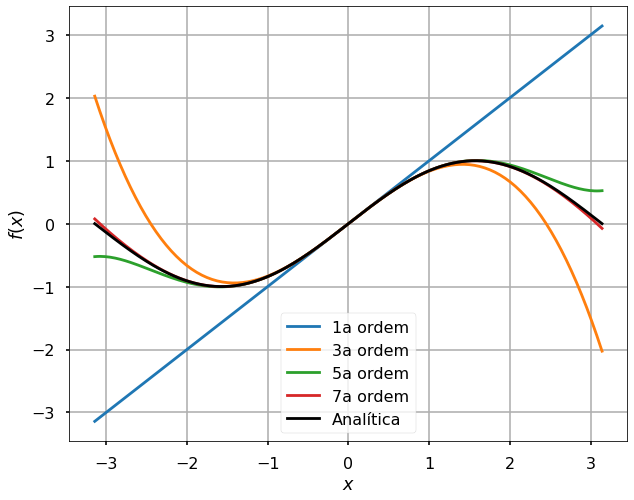

In [4]:
y = np.zeros(len(x))
plt.figure(figsize = (10,8))
for n,label in zip(range(4),['1a ordem', '3a ordem', '5a ordem', '7a ordem']):
    y += T(x,n)
    plt.plot(x,y, label = label)
plt.plot(x, np.sin(x), 'k', label = 'Analítica')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()

<div class="alert alert-block alert-info" style="color:Blue;" id="erro_taylor">
Discussões sobre erros em aproximações com séries de Taylor
</div>

Obviamente, se consideramos um número finito de termos na aproximação por série de Taylor, acabaremos, salvo funções específicas, gerando erros, afinal estamos considerando somente parte de toda a representação. E como em tudo de métodos numéricos, teremos a incidência de erros de **truncamento** e erros de **arredondamento**.

Os erros de arredondamento se devem à inexatidão na representação dos números reais em um computador e nas operações aritméticas feitas com eles. Embora os erros de truncamento sejam devidos à natureza aproximada do método usado, eles geralmente são causados pelo uso de uma aproximação no lugar de um procedimento matemático exato, como o uso da série de Taylor para aproximar uma função.

Por exemplo, considere a função $e^x$:

$$e^x = 1+x+\frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!} + \dots$$

Uma vez que é necessária a sequência infinita para aproximar a função, se pegarmos apenas alguns itens, teremos um erro de truncamento. Por exemplo, se usarmos apenas os primeiros 4 termos para aproximar $e^2$, teremos

$$e^2 \approx 1+2+\frac{2^2}{2!} + \frac{2^3}{3!} = 6.3333$$, 

que não é o valor mais exato pra representar essa função, se compararmos, por exemplo, com a aproximação feita pela função `np.exp()` da biblioteca Numpy.

Para compararmos isso, podemos usar o código abaixo, gerando a representação de $e^2$ para diferentes ordens e comparando, ao final, com a função `np.exp()`.

In [5]:
exp = 0
x = 2
for i in range(10):
    exp += ((x**i)/np.math.factorial(i))
    print(f'Usando {i} termo: {exp}')
    
print(f'\nUsando a Numpy: {np.exp(2)}')

Usando 0 termo: 1.0
Usando 1 termo: 3.0
Usando 2 termo: 5.0
Usando 3 termo: 6.333333333333333
Usando 4 termo: 7.0
Usando 5 termo: 7.266666666666667
Usando 6 termo: 7.355555555555555
Usando 7 termo: 7.3809523809523805
Usando 8 termo: 7.387301587301587
Usando 9 termo: 7.3887125220458545

Usando a Numpy: 7.38905609893065


E como mensurar esse erro? Entendendo que, considerando um número $n$ finito de termos da série, teremos

$$ f(x) = f_n(x) + E_n(x) = \sum_{k = 0}^{n} \frac{f^{(k)}(a)(x-a)^k}{k!} + E_n(x)
$$

em que $E_n(x)$ é o erro computado como aprendemos!

No caso aqui, em que "conhecemos" o valor final, é simples analisar. Bastaria comparar os valores, de preferencia de forma relativa. 

In [14]:
Ea = np.abs(np.exp(2) - 7.3809523809523805)
Ea

0.00810371797826992

Erro relativo quando conhecemos o valor real

$$
E_r = \left|\dfrac{v_r - v_a}{v_r}\right| = \left|1 - \dfrac{v_a}{v_r}\right|
$$

In [15]:
Er = np.abs(1 - 7.3809523809523805/np.exp(2))*100
Er

0.10967189678587896

E e não soubessemos esse valor que consideramos "real", como proceder? Calculando a diferença de forma iterativa!

Erro relativo iterativo

$$
E_r = \left|\dfrac{v_{ant} - v_{atual}}{v_{ant}}\right| = \left|1 - \dfrac{v_{atual}}{v_{ant}}\right|
$$

In [16]:
exp = 0
x = 2
l = []
for i in range(10):
    exp += ((x**i)/np.math.factorial(i))
    l.append(exp)

In [25]:
val = np.array(l)
val

array([1.        , 3.        , 5.        , 6.33333333, 7.        ,
       7.26666667, 7.35555556, 7.38095238, 7.38730159, 7.38871252])

$$
E_r = \left|\dfrac{v_{ant} - v_{atual}}{v_{ant}}\right| = \left|1 - \dfrac{v_{atual}}{v_{ant}}\right|
$$

In [30]:
Er = np.abs((7.38730159 - 7.38871252)/7.38730159)*100
Er

0.01909939621133671

### Tira dúvidas do exercício

In [42]:
## essa é a função exponencial; 
#usei pra não gerar expoiler e acabar com a graça
def arc(x,n):
    arco=0
    l=[]
    for i in range(n):
        arco += ((x**i)/np.math.factorial(i))
        l.append(arco)
    return np.array(l)

$$
\dfrac{\pi}{4} = 4\arctan \frac{1}{5} - \arctan \frac{1}{239}
$$

In [43]:
arctan1_5 = arc(1/5,20)
arctan1_5.shape

(20,)

In [44]:
arctan1_239 = arc(1/239,20)
arctan1_239.shape

(20,)

$$
\dfrac{\pi}{4} = 4\arctan \frac{1}{5} - \arctan \frac{1}{239}
$$

In [47]:
pi = 4*(4*arctan1_5 - arctan1_239)
pi

array([12.        , 15.1832636 , 15.50322858, 15.52456187, 15.52562854,
       15.5256712 , 15.52567262, 15.52567267, 15.52567267, 15.52567267,
       15.52567267, 15.52567267, 15.52567267, 15.52567267, 15.52567267,
       15.52567267, 15.52567267, 15.52567267, 15.52567267, 15.52567267])